In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv("poly.csv")

In [69]:
data.head()

,zaman,sicaklik
0,1,0
1,3,9
2,5,20
3,10,35
4,15,60


In [70]:
x = data.iloc[:,0].values.reshape(-1,1)
y = data.iloc[:,1].values.reshape(-1,1) 

In [71]:
x

array([[  1],
       [  3],
       [  5],
       [ 10],
       [ 15],
       [ 18],
       [ 25],
       [ 32],
       [ 39],
       [ 50],
       [ 60],
       [ 80],
       [105],
       [120],
       [200],
       [350]], dtype=int64)

In [72]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()  

In [73]:
x1 = scx.fit_transform(x)

In [74]:
x1

array([[-0.77000091],
       [-0.74753962],
       [-0.72507834],
       [-0.66892513],
       [-0.61277192],
       [-0.57907999],
       [-0.50046549],
       [-0.421851  ],
       [-0.3432365 ],
       [-0.21969944],
       [-0.10739302],
       [ 0.11721983],
       [ 0.39798588],
       [ 0.56644552],
       [ 1.46489689],
       [ 3.14949323]])

In [75]:
y1 = scy.fit_transform(y).ravel() #ravel() is used to convert 2D array into 1D array / ravel() fonksiyonu 2D arrayi 1D arraye çevirmek için kullanılır
y1

array([-2.06286535, -1.80589943, -1.49182996, -1.06355342, -0.34975918,
       -0.06424148,  0.27837975,  0.4211386 ,  0.59244922,  0.79231161,
        0.79231161,  0.79231161,  0.79231161,  0.79231161,  0.79231161,
        0.79231161])

In [76]:
from sklearn.svm import SVR
sv = SVR(kernel = "rbf",epsilon=0.01,C=1) #epsilon is the error value / epsilon hata değeridir

In [77]:
sv.fit(x1,y1)   

SVR(C=1, epsilon=0.01)

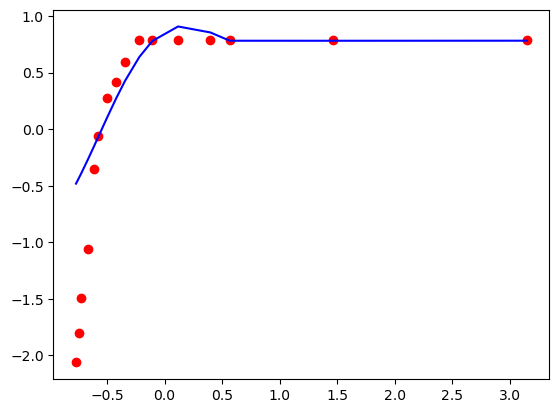

In [78]:
plt.scatter(x1,y1,color="red")  
plt.plot(x1,sv.predict(x1),color="blue")    

In [79]:
from sklearn.metrics import mean_squared_error, r2_score

# Tahminleri yap
y_pred = sv.predict(x1)

# RMSE hesapla
rmse = np.sqrt(mean_squared_error(scy.inverse_transform(y1.reshape(-1, 1)), scy.inverse_transform(y_pred.reshape(-1, 1))))
print(f"RMSE: {rmse}")

# R-squared (R²) hesapla
r2 = r2_score(scy.inverse_transform(y1.reshape(-1, 1)), scy.inverse_transform(y_pred.reshape(-1, 1)))
print(f"R²: {r2}")



RMSE: 22.105554686939122
R²: 0.601646264417583


In [80]:
# Manuel değeri numpy dizisine dönüştür
manual_value = np.array([[26]])

# Manuel değeri ölçeklendir
scaled_manual_value = scx.transform(manual_value)

# Tahmin yap
manual_prediction = sv.predict(scaled_manual_value)

# Tahmini orijinal ölçeğe dönüştür
original_scale_manual_prediction = scy.inverse_transform(manual_prediction.reshape(-1, 1))

print(f"26. süredeki tahmini değer: {original_scale_manual_prediction[0][0]}")


26. süredeki tahmini değer: 76.66863171005598
